# Individual Household Power Consumption

#### Exploratory data analysis is conducted using UC Irvine Machine Learning Repository "Individual Household Power Consumption" data set to examine how household energy usage varies over a 5-day period in February 2007. The data set has measurements of electric power consumptions in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantitites and some sub-metering values are included. 

Let's import the data, tidy it up, and create a simple histogram to quickly see what the data look like over a 5-day period. 

Set the file path to save the download to which is the user's current working directory.

In [2]:
path <- file.path(paste(getwd(), 'exdata%2Fdata%2Fhousehold_power_consumption.zip', sep = "/"))


Set the URL for the download to obtain the UC Irvine Machine Learning Repository "Individual Household Power Consumption" data set,

In [3]:
url <- "https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip";


Download the data set and save to the working directory we denoted in the "path" variable.

In [4]:
download.file(url, path)

The data set is in a zipped file. Let's allow the user to choose the correct file, then unzip the file and put it in the user's current working directory.

In [5]:
chooseFile<-file.choose()
workingDir<-getwd()
unzip(chooseFile,exdir = workingDir)

Import the data for February 1 2007 to February 5 2007.

In [6]:
imported_hpc <- read.table("household_power_consumption.txt", header = FALSE, nrows = 7200, skip = 66637 , sep = ";", 
    na.strings = c(" ", "NA", "?"), stringsAsFactors = FALSE, 
    strip.white = TRUE, col.names = c("Date", "Time", "Global_active_power", 
        "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"), 
    colClasses = c("character", "character", "numeric", "numeric", "numeric","numeric","numeric","numeric","numeric"))

We need to check the environment for required packages. Credit Matthew on StackOverflow https://stackoverflow.com/users/4125693/matthew for this code block.

In [7]:
using <- function(...) {
    libs <- unlist(list(...))
    req <- unlist(lapply(libs, require, character.only=TRUE))
    need <- libs[req==FALSE]
    n <- length(need)
    if(n > 0) {
        libsmsg <- if (n > 2) {paste(paste(need[1:(n-1)],collapse=", "), "," , sep="")}
                   else need[1]
        print(libsmsg)
        if (n > 1) {
            libsmsg <- paste(libsmsg, " and " , need[n], sep="")}
        libsmsg <- paste("The following packages could not be found: ", libsmsg, "\n\r\n\rInstall missing packages?", collapse="")
        if(winDialog(type = c("yesno"), libsmsg) == "YES") {
            install.packages(need) 
            lapply(need,require,character.only=TRUE)}
    }
}

Now we use our method to check for the required packages "tidyr" and "lubridate".

In [8]:
using("tidyr")
using("lubridate")

Loading required package: tidyr
Loading required package: lubridate

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



We combine the Date and Time variable columns together for tidier data.

In [9]:
imported_hpc <- unite(imported_hpc, "DateTime", c("Date", "Time"), sep = " ")


Let's convert the new column we made into a Date/Time class for easier plotting.

In [10]:
imported_hpc[ ,1] <- dmy_hms(imported_hpc[ ,1])

Plotting the data set for Global Active Power which is household global minute-averaged active power in kilowatts. This is the power which is actually consumed or utilized in an AC Circuit. <cite>[1]</cite>

[1]:https://en.wikipedia.org/wiki/AC_power

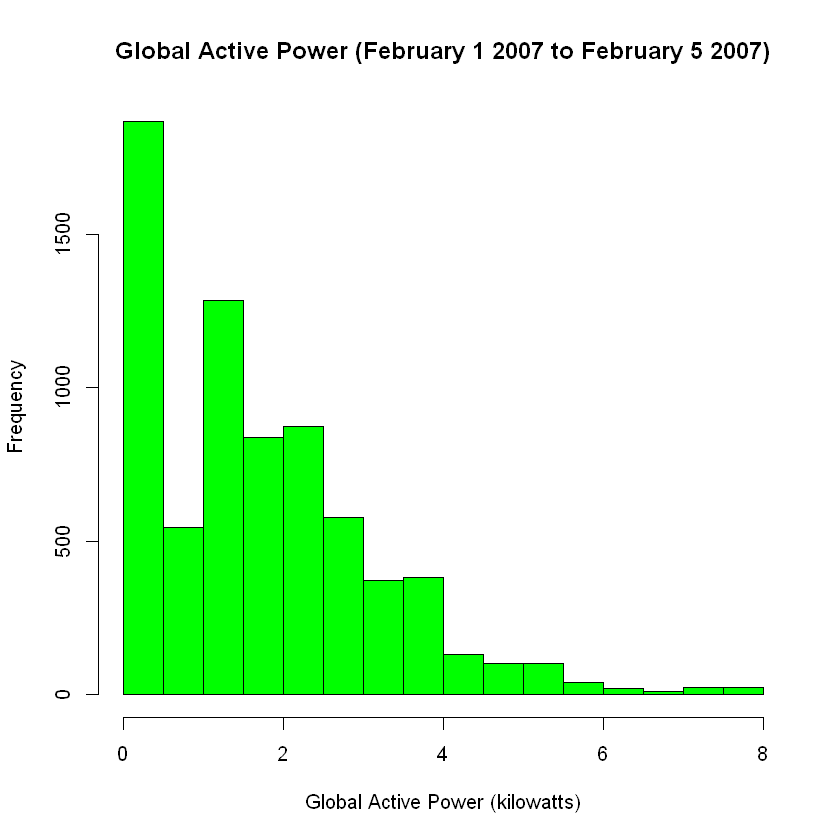

In [11]:
par(font.main = 2) 
hist(imported_hpc$Global_active_power, breaks = 20, freq = TRUE, 
    plot = TRUE, col = "green", main = "Global Active Power (February 1 2007 to February 5 2007)", xlab = "Global Active Power (kilowatts)", ylab = "Frequency") 


The data is right skewed with a higher frequency of Global Active Power consumption in the 0 to 0.5 kilowatts range for this household over the February 1st to February 5 time period.